In [1]:
import torch
import torchvision
from torchvision import transforms
from torch.utils import data
from torch import nn

In [ ]:
torch.version.cuda

In [2]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.MNIST(root='../data',train=True,
       transform=trans,download=True)

mnist_test = torchvision.datasets.MNIST(root='../data',train=False,
       transform=trans,download=True)

In [13]:
mnist_train[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [4]:
len(mnist_train[0][0]),type(mnist_train),mnist_train[0][0].shape,

(1, torchvision.datasets.mnist.MNIST, torch.Size([1, 28, 28]))

In [6]:
batch_size = 64
worker_num = 4
train_iter = data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=worker_num)
x,y = next(iter(train_iter))

test_iter =data.DataLoader(mnist_test,batch_size=batch_size,shuffle=True,num_workers=worker_num)



In [83]:
m = torch.reshape(torch.arange(4),(2,2))
m,m[0],m[0][0],m[:,0],m.sum(axis=0)

(tensor([[0, 1],
         [2, 3]]),
 tensor([0, 1]),
 tensor(0),
 tensor([0, 2]),
 tensor([2, 4]))

In [7]:
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28,10)
)

net1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28,256),
    nn.ReLU(),
    nn.Linear(256,10)
)



def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight)
        print(m.weight)

net.apply(init_weights)
net1.apply(init_weights)

Parameter containing:
tensor([[-0.5537, -0.6808, -1.0602,  ...,  2.7982,  0.9613,  0.5814],
        [ 0.1723,  1.5856,  2.3092,  ...,  1.9295, -0.2403,  0.6322],
        [-0.9467,  0.4239, -1.9879,  ...,  1.0999, -0.9785,  1.0164],
        ...,
        [ 1.7324,  0.7970, -0.4635,  ...,  1.4027,  0.5807, -1.1897],
        [ 0.0489,  0.2303, -0.4744,  ..., -0.3455, -0.7368,  0.0964],
        [-1.5729, -0.6324,  1.5487,  ..., -0.9316,  0.1482, -1.0869]],
       requires_grad=True)
Parameter containing:
tensor([[ 1.2408,  1.1245,  1.3638,  ...,  0.9004, -2.1179, -0.8751],
        [-1.0295, -0.6189,  0.1638,  ..., -1.0897,  0.1559, -0.3059],
        [-0.7629,  0.8232, -0.7335,  ..., -0.7017, -0.3502,  0.5869],
        ...,
        [ 0.0766,  0.1505,  0.3948,  ..., -0.3386, -1.5133,  0.0598],
        [-0.7197, -0.3048,  1.0224,  ...,  1.0355,  0.3363,  1.3966],
        [ 1.1644,  1.4873,  0.7481,  ..., -0.6809, -1.5262, -0.4253]],
       requires_grad=True)
Parameter containing:
tensor([[ 2.

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [15]:
torch.device('cuda')


device(type='cuda')

In [7]:
print(torch.__version__)
print(torch.cuda.is_available())

2.0.1+cu118
True


In [56]:
net1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28,256),
    nn.ReLU(),
    nn.Linear(256,10)
    
)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net1.to(device)         #加载模型到GPU上

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight)
        print(m.weight)

net1.apply(init_weights)

loss = nn.CrossEntropyLoss()                                #定义损失函数为交叉熵
trainer = torch.optim.SGD(net1.parameters(),lr=0.1)         #此时trainner已经知道网络的结构以及如何反向求导

acc_l = []
epoch_num = 10
for epoch in range(epoch_num):
    y_num = 0
    pos_num = 0
    for x,y in train_iter:
        x = x.to(device)        #将数据加载到dataloader上
        y = y.to(device)
        y_hat = net1(x)
        l = loss(y_hat,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()

        y_hat = y_hat.argmax(axis = 1)
        cmp = y_hat.type(y.dtype) == y
        positive_num = cmp.sum()
        pos_num += positive_num
        y_num += y.numel()
    acc = pos_num / y_num
    y_num = 0
    pos_num = 0
    with torch.no_grad():
        for x,y in test_iter:
            x = x.to(device)
            y = y.to(device)
            y_hat = net1(x)
            y_hat = y_hat.argmax(axis=1)
            cmp = y_hat.type(y.dtype) == y
            pos_num += cmp.sum()
            y_num += y.numel()

        t_acc = pos_num / y_num
    print("RELU NET1 epoch:"+ str(epoch)+" train acc:"+str(acc)+" test acc:" + str(t_acc))

Parameter containing:
tensor([[ 0.9409,  0.3293, -0.4305,  ..., -1.8169, -0.2399, -2.1546],
        [ 1.4246,  2.0480, -1.4935,  ..., -0.5468,  1.0160,  0.1774],
        [ 1.6806, -0.4691, -0.6375,  ...,  1.7257,  1.3602, -0.2299],
        ...,
        [-0.3699,  1.6262,  1.3302,  ...,  0.0117, -0.5362,  0.6195],
        [-0.3417,  0.6151, -1.2190,  ...,  0.3381, -0.7584,  1.5863],
        [ 0.0969, -0.5301, -1.4670,  ...,  0.4393, -0.6664, -1.1700]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 1.5328,  0.4533,  0.0732,  ..., -1.4821,  0.1004, -0.9540],
        [-0.3077,  0.8507,  0.6112,  ..., -0.7380, -0.1600, -0.0200],
        [-1.4800,  0.5172,  1.2238,  ..., -0.3072,  0.9062, -1.0643],
        ...,
        [-0.3649,  2.5179,  0.9216,  ..., -1.5292, -0.0898, -1.2664],
        [ 0.8670, -0.3942,  0.0032,  ..., -0.9505, -0.3783, -0.9162],
        [-1.3813,  0.5354, -2.1080,  ..., -0.3722, -0.6903,  0.4675]],
       device='cuda:0', requires_grad=True)


In [55]:
net1.parameters()

<generator object Module.parameters at 0x00000266CF1A1AF0>

In [14]:
net1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28,256),
    nn.Linear(256,10)
)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net1.to(device)

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight)
        print(m.weight)

net1.apply(init_weights)

loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net1.parameters(),lr=0.1)

acc_l = []
epoch_num = 35
for epoch in range(epoch_num):
    y_num = 0
    pos_num = 0
    for x,y in train_iter:
        x = x.to(device)
        y = y.to(device)
        y_hat = net1(x)
        l = loss(y_hat,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()

        y_hat = y_hat.argmax(axis = 1)
        cmp = y_hat.type(y.dtype) == y
        positive_num = cmp.sum()
        pos_num += positive_num
        y_num += y.numel()
    acc = pos_num / y_num
    y_num = 0
    pos_num = 0
    with torch.no_grad():
        for x,y in test_iter:
            x = x.to(device)
            y = y.to(device)
            y_hat = net1(x)
            y_hat = y_hat.argmax(axis=1)
            cmp = y_hat.type(y.dtype) == y
            pos_num += cmp.sum()
            y_num += y.numel()

        t_acc = pos_num / y_num
    print("NET1 epoch:"+ str(epoch)+" train acc:"+str(acc)+" test acc:" + str(t_acc))
        
        
    
        

Parameter containing:
tensor([[-2.9266, -0.3972,  0.8666,  ...,  1.0585, -0.4584, -1.5465],
        [-0.8435, -2.3588, -0.0224,  ...,  0.0211,  1.0834, -2.1053],
        [-0.5773,  0.1940, -0.7952,  ...,  0.5701,  1.0039,  1.0473],
        ...,
        [-1.0100, -0.6467,  0.0424,  ...,  1.3465, -0.5013, -1.0591],
        [ 1.1799, -0.9767, -2.4815,  ..., -1.0819,  0.4569,  0.4636],
        [ 0.8420,  0.4215,  0.0161,  ..., -0.4479, -0.3205,  1.4035]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 2.6155, -0.9290,  0.2478,  ...,  1.4076, -0.3018,  1.9793],
        [-1.8361,  0.2102, -0.6052,  ..., -1.2891,  0.6505,  0.4345],
        [ 1.6620,  0.3181,  0.6589,  ...,  0.5669, -1.5309,  0.3010],
        ...,
        [ 0.8252,  1.0049, -0.4161,  ..., -1.5556, -0.1481, -0.3990],
        [ 2.8029, -1.2911, -0.5146,  ...,  0.3455,  0.3947, -1.3327],
        [-0.3449, -1.6282,  0.5144,  ...,  1.0927,  0.0724, -1.5654]],
       device='cuda:0', requires_grad=True)


In [15]:
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28,10)
)

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight)
        print(m.weight)

net.apply(init_weights)

loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(),lr=0.1)

acc_l = []
epoch_num = 35
for epoch in range(epoch_num):
    y_num = 0
    pos_num = 0
    for x,y in train_iter:
        y_hat = net(x)
        l = loss(y_hat,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()

        y_hat = y_hat.argmax(axis = 1)
        cmp = y_hat.type(y.dtype) == y
        positive_num = cmp.sum()
        pos_num += positive_num
        y_num += y.numel()
    acc = pos_num / y_num
    y_num = 0
    pos_num = 0
    with torch.no_grad():
        for x,y in test_iter:
            y_hat = net(x)
            y_hat = y_hat.argmax(axis=1)
            cmp = y_hat.type(y.dtype) == y
            pos_num += cmp.sum()
            y_num += y.numel()

        t_acc = pos_num / y_num
    print("epoch:"+ str(epoch)+" train acc:"+str(acc)+" test acc:" + str(t_acc))

Parameter containing:
tensor([[ 0.0383,  0.8840,  2.1829,  ...,  0.2992,  1.7481,  1.0355],
        [-1.3725, -0.1229,  0.3933,  ...,  0.1188, -0.7940, -1.1025],
        [-0.6111,  0.7120,  0.2814,  ..., -1.0841, -1.3800,  0.3569],
        ...,
        [-0.2812, -2.2271, -0.3444,  ..., -1.9794, -0.4506,  0.1355],
        [ 2.0004, -0.7227, -0.8992,  ...,  0.4950,  0.2703,  0.0983],
        [-0.6151, -0.3467, -0.6199,  ..., -1.9513, -0.4260, -0.7879]],
       requires_grad=True)
epoch:0 train acc:tensor(0.6550) test acc:tensor(0.8012)
epoch:1 train acc:tensor(0.8166) test acc:tensor(0.8432)
epoch:2 train acc:tensor(0.8453) test acc:tensor(0.8620)
epoch:3 train acc:tensor(0.8586) test acc:tensor(0.8672)
epoch:4 train acc:tensor(0.8670) test acc:tensor(0.8760)
epoch:5 train acc:tensor(0.8733) test acc:tensor(0.8791)
epoch:6 train acc:tensor(0.8774) test acc:tensor(0.8840)
epoch:7 train acc:tensor(0.8810) test acc:tensor(0.8876)
epoch:8 train acc:tensor(0.8844) test acc:tensor(0.8908)
epoc

In [53]:
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28,10)
)

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight)
        print(m.weight)

net.apply(init_weights)

loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(),lr=1)


acc_l = []
epoch_num = 10
for epoch in range(epoch_num):
    y_num = 0
    pos_num = 0
    for x,y in train_iter:
        y_hat = net(x)
        l = loss(y_hat,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()

        y_hat = y_hat.argmax(axis = 1)
        cmp = y_hat.type(y.dtype) == y
        positive_num = cmp.sum()
        pos_num += positive_num
        y_num += y.numel()
    acc = pos_num / y_num
    y_num = 0
    pos_num = 0
    with torch.no_grad():
        for x,y in test_iter:
            y_hat = net(x)
            y_hat = y_hat.argmax(axis=1)
            cmp = y_hat.type(y.dtype) == y
            pos_num += cmp.sum()
            y_num += y.numel()

        t_acc = pos_num / y_num
    print("epoch:"+ str(epoch)+" train acc:"+str(acc)+" test acc:" + str(t_acc))

Parameter containing:
tensor([[ 0.6774,  0.2920, -0.3748,  ...,  0.9559,  0.1662,  0.1861],
        [-0.8039, -0.2686,  0.3063,  ...,  0.3829, -0.6849, -1.2516],
        [ 0.5782, -1.1185,  1.1356,  ..., -1.3706, -0.6860, -0.6960],
        ...,
        [-0.3401, -1.4149, -0.5510,  ...,  0.5118, -0.9675,  0.0607],
        [ 0.3590, -0.7676,  0.0838,  ...,  1.2927, -1.4843, -0.1991],
        [-0.3457, -0.1029, -0.5950,  ..., -0.9965,  0.7509, -0.5314]],
       requires_grad=True)
epoch:0 train acc:tensor(0.8358) test acc:tensor(0.8784)
epoch:1 train acc:tensor(0.8867) test acc:tensor(0.8908)
epoch:2 train acc:tensor(0.8968) test acc:tensor(0.9045)
epoch:3 train acc:tensor(0.9010) test acc:tensor(0.9109)
epoch:4 train acc:tensor(0.9058) test acc:tensor(0.9003)
epoch:5 train acc:tensor(0.9094) test acc:tensor(0.9092)
epoch:6 train acc:tensor(0.9108) test acc:tensor(0.9075)
epoch:7 train acc:tensor(0.9115) test acc:tensor(0.9063)
epoch:8 train acc:tensor(0.9134) test acc:tensor(0.8946)
epoc

原始输入
torch.Size([1, 28, 28])
原始输出
tensor([[ -2.9996,  -9.2320,   0.6083,   9.7574, -11.0672,  11.5504, -10.3458,
          -0.0734,  -0.4477,  -1.0974]]) 
概率化输出
tensor([[4.1129e-07, 8.0809e-10, 1.5172e-05, 1.4271e-01, 1.2896e-10, 8.5726e-01,
         2.6530e-10, 7.6728e-06, 5.2772e-06, 2.7559e-06]])
概率求和
tensor(1.)
识别结果
tensor(5)


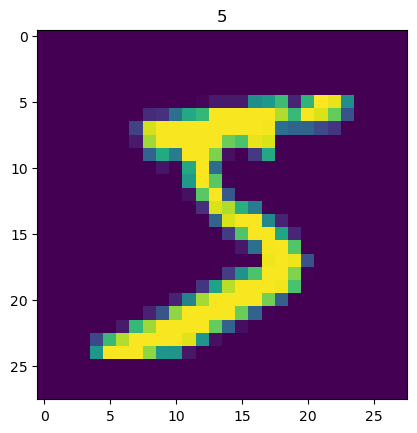

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = plt.axes()
data_ = mnist_train[0]
#ax.imshow(data_[0]) 
ax.imshow(torch.reshape(data_[0],(28,28)))
ax.set_title(str(data_[1]))

with torch.no_grad():
    y = net(data_[0])
    sof = nn.Softmax(dim=1)
    ans = sof(y)
    print("原始输入\n"+str(data_[0].shape)+
        "\n原始输出\n"+str(y),
          "\n概率化输出\n"+str(ans)+
          "\n概率求和\n"+str(ans.sum())+
          "\n识别结果\n"+str(ans.argmax()))
    
